# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd



# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here: Quito el símbolo de euro
def limpiarValues(x):
    d = []
    for e in x:
        d.append(e.strip("€"))
    return d
    
e = limpiarValues(fifa.Value)


In [5]:
#Cambio las valores de M y K por su cuantia con ceros
multipliers = {'K':1000, 'M':1000000}

def string_to_int(string):
    if string[-1].isdigit(): # check if no suffix
        return int(string)
    mult = multipliers[string[-1]] # look up suffix to get multiplier
     # convert number to float, multiply by multiplier, then make int
    return int(float(string[:-1]) * mult)



fifa["ValueNumeric"] = (list(map(string_to_int, e)))
fifa.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
#cambio lel tipo de la columna a int
fifa.ValueNumeric.astype(int)


0        110500000
1         77000000
2        118500000
3         72000000
4        102000000
           ...    
18202        60000
18203        60000
18204        60000
18205        60000
18206        60000
Name: ValueNumeric, Length: 18207, dtype: int64

In [7]:
# Your code here:
import statsmodels.formula.api as smf
import statsmodels.api as sm



model = smf.ols('fifa["ValueNumeric"] ~  C(fifa["Preferred Foot"])', data=fifa).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",1.609973e+14,1.0,5.132594,0.023492
Residual,5.695422e+17,18157.0,NaN,NaN


What is your conclusion from this ANOVA?

In [8]:
# Your conclusions here:
# Mi conclusión es que como el PValue (PR) es menor que nuestro Alpha entonces se rechaza nuestra hipotesis de que 
#los zurdos cobran más,pero por muy poco :P


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [9]:
# Your code here:
model2 = smf.ols('fifa.ValueNumeric ~ C(fifa.Nationality)', data=fifa).fit()

sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(fifa.Nationality),3.281224e+16,163.0,6.762478,4.840479e-134
Residual,5.370951e+17,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [10]:
#Sacamos la conclusión de que como el PValue es menor de 0,05 se rechaza la hipótesis nula.
#No tiene relación entre el Valor y la Nacionalidad

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [11]:
# Your code here:

columnsNaN =fifa.isnull().sum().index
fifa2 = fifa.dropna(subset = columnsNaN)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [23]:
#spector_data = sm.datasets.spector.load(as_pandas=False)

fifa2 = sm.add_constant(fifa[["Stamina","SprintSpeed"]])

# Fit and summarize OLS model
mod = smf.ols('fifa.ValueNumeric ~ C(fifa2.Stamina) + C(fifa2.SprintSpeed)', data=fifa).fit()

sm.stats.anova_lm(mod, typ=2)
#Como el PV es inferior a 0,05

,sum_sq,df,F,PR(>F)
C(fifa2.Stamina),3.271582e+16,84.0,13.973494,1.052452e-184
C(fifa2.SprintSpeed),2.103855e+16,84.0,8.985932,8.373779e-106
Residual,5.014234e+17,17990.0,NaN,NaN


In [24]:
# Your conclusions here:
#Como el PV es inferior a 0,05 no tiene relación con el sueldo ni la Stamina ni SprintSpeed.
#Rechazamos la hipótesis


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [25]:
# Your code here:
A = np.identity(len(mod.params))
print(mod.f_test(A))

<F test: F=array([[37.00013482]]), p=0.0, df_denom=1.8e+04, df_num=169>


In [26]:
fifa = sm.add_constant(fifa)
mod3 = smf.ols('fifa.ValueNumeric ~ C(fifa.Stamina) + C(SprintSpeed)', data=fifa).fit()


/home/sergio/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [46]:
# Your conclusions here:
D = np.identity(len(mod3.params))
print(mod.f_test(D))


<F test: F=array([[37.00013482]]), p=0.0, df_denom=1.8e+04, df_num=169>
<F test: F=array([[37.00013482]]), p=0.0, df_denom=1.8e+04, df_num=169>


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

TypeError: float() argument must be a string or a number, not 'ContrastResults'

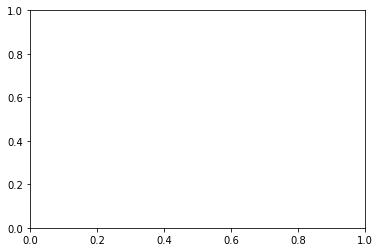

In [47]:
# Your code here:
import matplotlib.pyplot as plt
plt.scatter(mod.f_test(D),mod3)
#No estoy siendo capaz de plotearlo :(